In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import linregress

</br></br></br>

# Load CPI Historical Data

In [2]:
cpi_df = pd.read_csv("cpi.csv")

display(cpi_df.fillna(0.0).head(12))

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,2012,226.665,227.663,229.392,230.085,229.815,229.478,229.104,230.379,231.407,231.317,230.221,229.601
1,2013,230.280,232.166,232.773,232.531,232.945,233.504,233.596,233.877,234.149,233.546,233.069,233.049
2,2014,233.916,234.781,236.293,237.072,237.900,238.343,238.250,237.852,238.031,237.433,236.151,234.812
3,2015,233.707,234.722,236.119,236.599,237.805,238.638,238.654,238.316,237.945,237.838,237.336,236.525
4,2016,236.916,237.111,238.132,239.261,240.229,241.018,240.628,240.849,241.428,241.729,241.353,241.432
5,2017,242.839,243.603,243.801,244.524,244.733,244.955,244.786,245.519,246.819,246.663,246.669,246.524
6,2018,247.867,248.991,249.554,250.546,251.588,251.989,252.006,252.146,252.439,252.885,252.038,251.233
7,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974
8,2020,257.971,258.678,258.115,256.389,256.394,257.797,259.101,259.918,260.280,260.388,260.229,260.474
9,2021,261.582,263.014,264.877,267.054,269.195,271.696,273.003,273.567,274.310,276.589,277.948,278.802


In [3]:
months = cpi_df.columns.values.tolist()
cpi_data_array = cpi_df.fillna(0.0).to_numpy()

print(months)
print(cpi_data_array.shape)

['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
(11, 13)


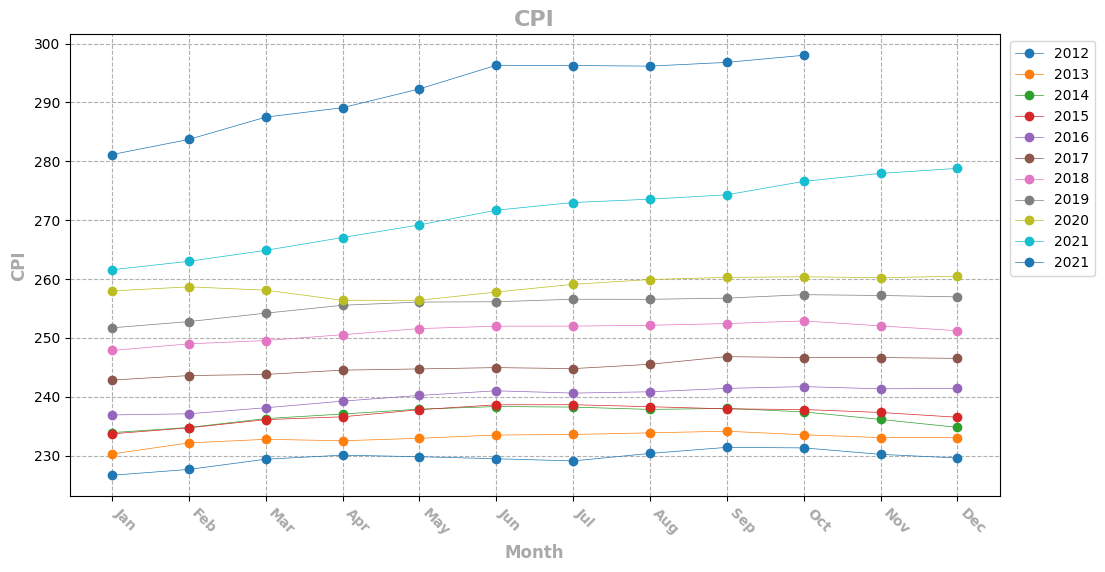

In [4]:
fig = plt.figure(figsize=(12., 6.0))
ax = fig.gca()

# Prior years with complete data:
for idx in range(cpi_data_array.shape[0] - 1):
    ax.plot(np.arange(12), cpi_data_array[idx,1:], lw=0.5, marker="o", label=str(int(cpi_data_array[idx,0])))
# 2022 is incomplete:
ax.plot(np.arange(10), cpi_data_array[-1,1:-2], lw=0.5, marker="o", label=str(int(cpi_data_array[idx,0])))

ax.legend(bbox_to_anchor=(1.11, 1.0))
ax.set_title("CPI", fontsize=16, fontweight="bold", color="darkgrey")
ax.set_ylabel("CPI", fontsize=12, fontweight="bold", color="darkgrey")
ax.set_xlabel("Month", fontsize=12, fontweight="bold", color="darkgrey")
ax.set_xticks(np.arange(12))
ax.set_xticklabels(months[1:], rotation=-45, ha="left", va="top", 
                   fontsize=10, fontweight="bold", color="darkgrey")
ax.grid(ls="--")
ax.set_axisbelow(True)

plt.show()


Pre-2021:
	Slope:     0.00126  (Annual: 0.015)
	Intercept: 5.42468

Post-2021:
	Slope:     0.00681  (Annual: 0.082)
	Intercept: 4.82941


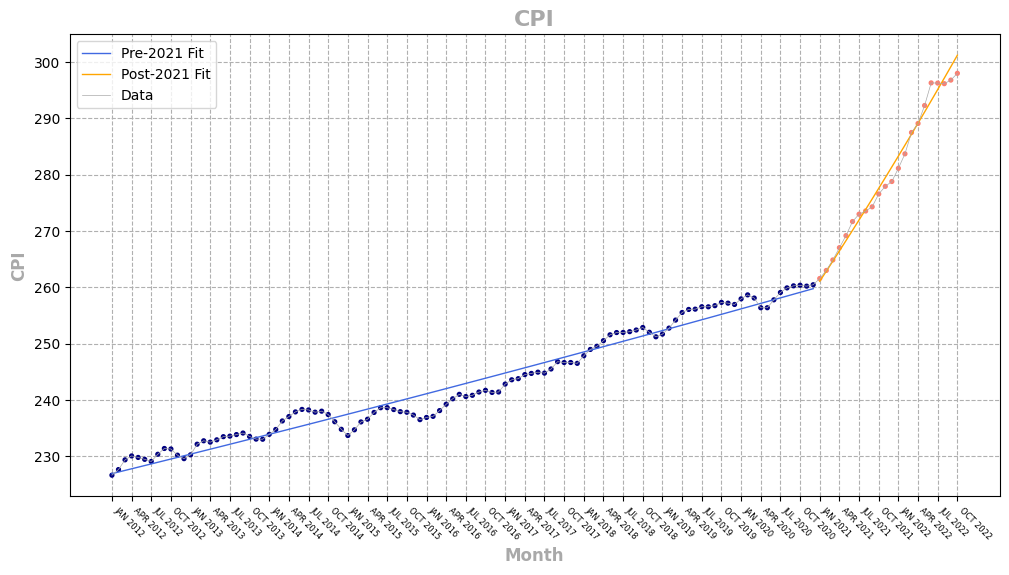

In [5]:
fig = plt.figure(figsize=(12., 6.0))
ax = fig.gca()

x = np.arange(11 * 12 - 2)
y = cpi_data_array[:,1:].flatten(order="C")[:-2]


# Fits:
pre_end_idx = 9 * 12
post_end_idx = -3
pre_slope, pre_intercept, _, _, _ = linregress(
    x[:pre_end_idx], np.log(y[:pre_end_idx]))
post_slope, post_intercept, _, _, _ = linregress(
    x[pre_end_idx:post_end_idx], np.log(y[pre_end_idx:post_end_idx]))
ax.plot(
    x[:pre_end_idx], 
    np.exp(pre_slope * x[:pre_end_idx] + pre_intercept), 
    color="royalblue", lw=1.0, marker="", label="Pre-2021 Fit")
ax.plot(
    # x[pre_end_idx:post_end_idx], 
    # np.exp(post_slope * x[pre_end_idx:post_end_idx] + post_intercept), 
    x[pre_end_idx:], 
    np.exp(post_slope * x[pre_end_idx:] + post_intercept), 
    color="orange", lw=1.0, marker="", label="Post-2021 Fit")
print("\nPre-2021:")
print(f"\tSlope:     {np.around(pre_slope, 5)}  (Annual: {np.around(12 * pre_slope, 3)})")
print(f"\tIntercept: {np.around(pre_intercept, 5)}")
print("\nPost-2021:")
print(f"\tSlope:     {np.around(post_slope, 5)}  (Annual: {np.around(12 * post_slope, 3)})")
print(f"\tIntercept: {np.around(post_intercept, 5)}")

# Data plots:
colors = np.where(x < pre_end_idx, "navy", "salmon").tolist()
ax.plot(x, y, color="darkgrey", lw=0.5, marker="", label="Data")
ax.scatter(x, y, color=colors, s=7.5, marker="o", label="")

ax.legend(loc="upper left")
ax.set_title("CPI", fontsize=16, fontweight="bold", color="darkgrey")
ax.set_ylabel("CPI", fontsize=12, fontweight="bold", color="darkgrey")
ax.set_xlabel("Month", fontsize=12, fontweight="bold", color="darkgrey")
xlables = []
for y in range(11):
    for m in months[1:]:
        xlables.append(m.upper() + " " + str(y + 2012))
ax.set_xticks(np.arange(11 * 12)[::3])
ax.set_xticklabels(xlables[::3], rotation=-45, ha="left", va="top", 
    fontsize=6, fontweight="normal", color="black")
ax.set_axisbelow(True)
# ax.set_yscale("log")
ax.grid(ls="--", which="both")

plt.show()

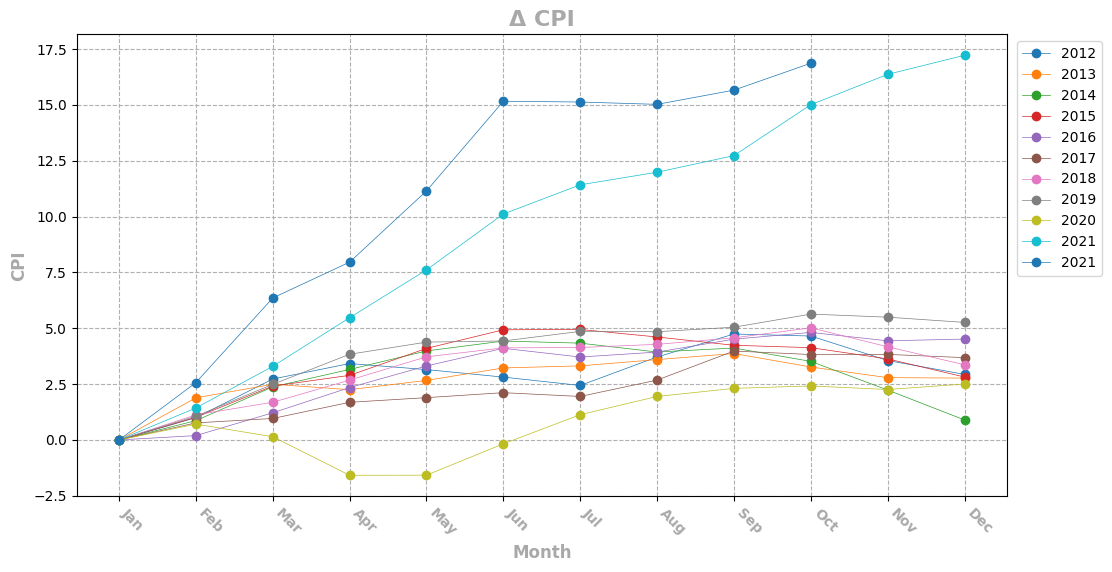

In [6]:
fig = plt.figure(figsize=(12., 6.0))
ax = fig.gca()

# Prior years with complete data:
for idx in range(cpi_data_array.shape[0] - 1):
    ax.plot(np.arange(12), cpi_data_array[idx,1:] - cpi_data_array[idx,1],  # cpi_data_array[idx,1:].mean(), 
            lw=0.5, marker="o", label=str(int(cpi_data_array[idx,0])))
# 2022 is incomplete:
ax.plot(np.arange(10), cpi_data_array[-1,1:-2] - cpi_data_array[-1,1],  # cpi_data_array[-1,1:-2].mean(), 
        lw=0.5, marker="o", label=str(int(cpi_data_array[idx,0])))

ax.legend(bbox_to_anchor=(1.11, 1.0))
ax.set_title("Δ CPI", fontsize=16, fontweight="bold", color="darkgrey")
ax.set_ylabel("CPI", fontsize=12, fontweight="bold", color="darkgrey")
ax.set_xlabel("Month", fontsize=12, fontweight="bold", color="darkgrey")
ax.set_xticks(np.arange(12))
ax.set_xticklabels(months[1:], rotation=-45, ha="left", va="top", 
                   fontsize=10, fontweight="bold", color="darkgrey")
ax.grid(ls="--")
ax.set_axisbelow(True)

plt.show()